In [44]:
# 環境構築
# pip3 install --upgrade setuptools pip
# pip3 uninstall jinja2 tornado
# pip3 install --upgrade notebook jupyterhub

In [43]:
import os
import pandas as pd
from pycaret.regression import *

https://resanaplaza.com/2022/03/20/%E3%80%90%E3%82%84%E3%81%95%E3%81%97%E3%81%8F%E5%9B%B3%E8%A7%A3%E3%80%91pycaret%E3%81%AE%E4%BD%BF%E3%81%84%E6%96%B9%EF%BC%88windows%EF%BC%89/#:~:text=Pycaret%E3%81%AE%E3%82%A4%E3%83%B3%E3%82%B9%E3%83%88%E3%83%BC%E3%83%AB%E6%96%B9%E6%B3%95,-%E3%81%82%E3%82%89%E3%81%8B%E3%81%98%E3%82%81%E3%80%81%E3%82%A4%E3%83%B3%E3%82%B9%E3%83%88%E3%83%BC%E3%83%AB%E3%81%95%E3%82%8C&text=%E3%82%A4%E3%83%B3%E3%82%B9%E3%83%88%E3%83%BC%E3%83%AB%E6%96%B9%E6%B3%95%E3%81%AF%E4%BB%96%E3%81%AE,%E3%83%91%E3%83%83%E3%82%B1%E3%83%BC%E3%82%B8%E3%82%82%E3%82%A4%E3%83%B3%E3%82%B9%E3%83%88%E3%83%BC%E3%83%AB%E3%81%95%E3%82%8C%E3%81%BE%E3%81%99%E3%80%82

https://torch.classcat.com/2020/12/18/pycaret-2-2-tutorials-regression-reg101/

In [45]:
pd.set_option('display.max_columns', None)

In [46]:
file = 'A:/TEST/TEST_UCHIYAMA/case_lists-20230328T042300Z-001/msk_impact_2017/data_mutations.txt'
df = pd.read_csv(file, sep='\t', header=1)

FileNotFoundError: [Errno 2] No such file or directory: 'A:/TEST/TEST_UCHIYAMA/case_lists-20230328T042300Z-001/msk_impact_2017/data_mutations.txt'

In [ ]:
df.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_File,Sequencer,t_ref_count,t_alt_count,n_ref_count,n_alt_count,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,RefSeq,Protein_position,Codons,Hotspot,cDNA_change
0,SPEN,NaN,NaN,GRCh37,1,16265908,16265908,+,missense_variant,Missense_Mutation,SNP,A,A,T,NaN,NaN,P-0000004-T01-IM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400,73,NaN,NaN,ENST00000375759.3:c.10981A>T,p.Ile3661Phe,p.I3661F,ENST00000375759,NM_015001.2,3661.0,Att/Ttt,0,c.10981A>T
1,ALK,NaN,NaN,GRCh37,2,29543736,29543736,+,missense_variant,Missense_Mutation,SNP,A,A,G,NaN,NaN,P-0000004-T01-IM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180,13,NaN,NaN,ENST00000389048.3:c.1427T>C,p.Val476Ala,p.V476A,ENST00000389048,NM_004304.4,476.0,gTg/gCg,0,c.1427T>C
2,PDCD1,NaN,NaN,GRCh37,2,242793433,242793433,+,missense_variant,Missense_Mutation,SNP,G,G,A,NaN,NaN,P-0000004-T01-IM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,15,NaN,NaN,ENST00000334409.5:c.644C>T,p.Ala215Val,p.A215V,ENST00000334409,NM_005018.2,215.0,gCc/gTc,0,c.644C>T
3,MAP3K1,NaN,NaN,GRCh37,5,56177843,56177843,+,missense_variant,Missense_Mutation,SNP,C,C,G,NaN,NaN,P-0000004-T01-IM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370,12,NaN,NaN,ENST00000399503.3:c.2816C>G,p.Ser939Cys,p.S939C,ENST00000399503,NM_005921.1,939.0,tCt/tGt,0,c.2816C>G
4,FLT4,NaN,NaN,GRCh37,5,180030313,180030313,+,missense_variant,Missense_Mutation,SNP,C,C,A,NaN,NaN,P-0000004-T01-IM3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360,25,NaN,NaN,ENST00000261937.6:c.3971G>T,p.Arg1324Leu,p.R1324L,ENST00000261937,NM_182925.4,1324.0,cGg/cTg,0,c.3971G>T


In [ ]:
df.loc[:, ["Tumor_Sample_Barcode", "Hugo_Symbol"]].head

,Tumor_Sample_Barcode,Hugo_Symbol
0,P-0000004-T01-IM3,SPEN
1,P-0000004-T01-IM3,ALK
2,P-0000004-T01-IM3,PDCD1
3,P-0000004-T01-IM3,MAP3K1
4,P-0000004-T01-IM3,FLT4


In [ ]:
len(df['Tumor_Sample_Barcode'].unique())

10129

In [ ]:
len(df['Hugo_Symbol'].unique())

414

In [ ]:
df_mutation_count = pd.crosstab(df["Tumor_Sample_Barcode"], df["Hugo_Symbol"])

In [ ]:
df_mutation_count.head()

Hugo_Symbol,ABL1,ACVR1,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,EP300,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH2,FAM175A,FAM46C,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST2H3D,HIST3H3,HLA-A,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KRAS,LATS1,LATS2,LMO1,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAP3K14,MAPK1,MAPK3,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MPL,MRE11A,MSH2,MSH6,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTRK1,NTRK2,NTRK3,NUP93,OBSL1,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPM1D,PPP2R1A,PPP6C,PRDM1,PRKAR1A,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RUNX1,RYBP,SDCCAG8,SDHA,SDHAF2,SDHB,SDHC,SDHD,SETD2,SF3B1,SH2B3,SH2D1A,SHQ1,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SOCS1,SOX17,SOX2,SOX9,SPEN,SPOP,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK40,SUFU,SUZ12,SYK,TBX3,TCEB1,TCF3,TCF7L2,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,VEGFA,VHL,VTCN1,WT1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000004-T01-IM3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
P-0000015-T01-IM3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [ ]:
df_mutation_count.shape

(10129, 415)

In [ ]:
df_mutation_count.describe()

Hugo_Symbol,ABL1,ACVR1,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,EP300,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH2,FAM175A,FAM46C,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST2H3D,HIST3H3,HLA-A,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KRAS,LATS1,LATS2,LMO1,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAP3K14,MAPK1,MAPK3,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MPL,MRE11A,MSH2,MSH6,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTRK1,NTRK2,NTRK3,NUP93,OBSL1,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPM1D,PPP2R1A,PPP6C,PRDM1,PRKAR1A,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RUNX1,RYBP,SDCCAG8,SDHA,SDHAF2,SDHB,SDHC,SDHD,SETD2,SF3B1,SH2B3,SH2D1A,SHQ1,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SOCS1,SOX17,SOX2,SOX9,SPEN,SPOP,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK40,SUFU,SUZ12,SYK,TBX3,TCEB1,TCF3,TCF7L2,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,VEGFA,VHL,VTCN1,WT1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.0000

In [ ]:
df_mutation = df_mutation_count.clip(upper=1).reset_index()

In [ ]:
df_mutation

Hugo_Symbol,Tumor_Sample_Barcode,ABL1,ACVR1,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,EP300,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH2,FAM175A,FAM46C,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST2H3D,HIST3H3,HLA-A,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KRAS,LATS1,LATS2,LMO1,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAP3K14,MAPK1,MAPK3,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MPL,MRE11A,MSH2,MSH6,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTRK1,NTRK2,NTRK3,NUP93,OBSL1,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPM1D,PPP2R1A,PPP6C,PRDM1,PRKAR1A,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RUNX1,RYBP,SDCCAG8,SDHA,SDHAF2,SDHB,SDHC,SDHD,SETD2,SF3B1,SH2B3,SH2D1A,SHQ1,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SOCS1,SOX17,SOX2,SOX9,SPEN,SPOP,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK40,SUFU,SUZ12,SYK,TBX3,TCEB1,TCF3,TCF7L2,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,VEGFA,VHL,VTCN1,WT1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2
0,P-0000004-T01-IM3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,P-0000015-T01-IM3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
df_mutation.describe()

Hugo_Symbol,ABL1,ACVR1,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,EP300,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH2,FAM175A,FAM46C,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST2H3D,HIST3H3,HLA-A,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KRAS,LATS1,LATS2,LMO1,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAP3K14,MAPK1,MAPK3,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MPL,MRE11A,MSH2,MSH6,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTRK1,NTRK2,NTRK3,NUP93,OBSL1,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPM1D,PPP2R1A,PPP6C,PRDM1,PRKAR1A,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RUNX1,RYBP,SDCCAG8,SDHA,SDHAF2,SDHB,SDHC,SDHD,SETD2,SF3B1,SH2B3,SH2D1A,SHQ1,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SOCS1,SOX17,SOX2,SOX9,SPEN,SPOP,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK40,SUFU,SUZ12,SYK,TBX3,TCEB1,TCF3,TCF7L2,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,VEGFA,VHL,VTCN1,WT1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.0000

In [ ]:
file = 'A:/TEST/TEST_UCHIYAMA/case_lists-20230328T042300Z-001/msk_impact_2017_clinical_data.mod.tsv'
df_Colon_info =  pd.read_csv(file, sep='\t')

In [ ]:
df_Colon_info.head()

,Sample ID,DNA Input,Fraction Genome Altered,Mutation Count,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Sample coverage,Sample Type,Sex,Smoking History,Specimen Preservation Type,TMB (nonsynonymous),Tumor Purity
0,P-0000119-T01-IM3,250.0,0.2312,9,NaN,1:DECEASED,Cecum,610,Metastasis,Female,Never,FFPE,9.982398,70.0
1,P-0000241-T01-IM3,250.0,0.1980,8,5.59,1:DECEASED,Ascending Colon,902,Metastasis,Female,Never,FFPE,8.873242,60.0
2,P-0000520-T01-IM3,250.0,0.2168,5,NaN,0:LIVING,Cecum,618,Primary,Male,Prev/Curr Smoker,FFPE,5.545777,60.0
3,P-0000526-T01-IM3,250.0,0.3912,6,NaN,0:LIVING,Sigmoid Colon,688,Metastasis,Female,Never,FFPE,6.654932,60.0
4,P-0000552-T01-IM3,250.0,0.2744,6,3.39,1:DECEASED,Sigmoid Colon,756,Metastasis,Male,Prev/Curr Smoker,FFPE,6.654932,70.0


In [ ]:
df_mut = df_mutation.rename({'Tumor_Sample_Barcode': 'Sample ID'}, axis=1)

In [ ]:
df_mut.head()

Hugo_Symbol,Sample ID,ABL1,ACVR1,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,EP300,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH2,FAM175A,FAM46C,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST2H3D,HIST3H3,HLA-A,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KRAS,LATS1,LATS2,LMO1,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAP3K14,MAPK1,MAPK3,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MPL,MRE11A,MSH2,MSH6,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTRK1,NTRK2,NTRK3,NUP93,OBSL1,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPM1D,PPP2R1A,PPP6C,PRDM1,PRKAR1A,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RUNX1,RYBP,SDCCAG8,SDHA,SDHAF2,SDHB,SDHC,SDHD,SETD2,SF3B1,SH2B3,SH2D1A,SHQ1,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SOCS1,SOX17,SOX2,SOX9,SPEN,SPOP,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK40,SUFU,SUZ12,SYK,TBX3,TCEB1,TCF3,TCF7L2,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,VEGFA,VHL,VTCN1,WT1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2
0,P-0000004-T01-IM3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,P-0000015-T01-IM3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
df_merge = pd.merge(df_Colon_info, df_mut, how='left', on='Sample ID')

In [ ]:
df_merge.head()

,Sample ID,DNA Input,Fraction Genome Altered,Mutation Count,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Sample coverage,Sample Type,Sex,Smoking History,Specimen Preservation Type,TMB (nonsynonymous),Tumor Purity,ABL1,ACVR1,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,EP300,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH2,FAM175A,FAM46C,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST2H3D,HIST3H3,HLA-A,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KRAS,LATS1,LATS2,LMO1,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAP3K14,MAPK1,MAPK3,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MPL,MRE11A,MSH2,MSH6,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTRK1,NTRK2,NTRK3,NUP93,OBSL1,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPM1D,PPP2R1A,PPP6C,PRDM1,PRKAR1A,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RUNX1,RYBP,SDCCAG8,SDHA,SDHAF2,SDHB,SDHC,SDHD,SETD2,SF3B1,SH2B3,SH2D1A,SHQ1,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SOCS1,SOX17,SOX2,SOX9,SPEN,SPOP,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK40,SUFU,SUZ12,SYK,TBX3,TCEB1,TCF3,TCF7L2,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,VEGFA,VHL,VTCN1,WT1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2
0,P-0000119-T01-IM3,250.0,0.2312,9,NaN,1:DECEASED,Cecum,610,Metastasis,Female,Never,FFPE,9.982398,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
file = 'A:/TEST/TEST_UCHIYAMA/case_lists-20230328T042300Z-001/msk_impact_CC_mutation.txt'
df_merge.to_csv(file, index=False)

In [ ]:
# ここから再開
file = '/Users/tomoyauchiyama/Downloads/code/msk_impact_CC_mutation.txt'
df = pd.read_csv(file)

In [ ]:
# On-Hotエンコーディング
df_sex_life = df.loc[:, ['Overall Survival Status', 'Sex', 'Smoking History']]

In [ ]:
df_sex_life.head()

,Overall Survival Status,Sex,Smoking History
0,1:DECEASED,Female,Never
1,1:DECEASED,Female,Never
2,0:LIVING,Male,Prev/Curr Smoker
3,0:LIVING,Female,Never
4,1:DECEASED,Male,Prev/Curr Smoker


In [ ]:
df_dummy = pd.get_dummies(df_sex_life)

In [ ]:
df_dummy.head()

,Overall Survival Status_0:LIVING,Overall Survival Status_1:DECEASED,Sex_Female,Sex_Male,Smoking History_Never,Smoking History_Prev/Curr Smoker,Smoking History_Unknown
0,0,1,1,0,1,0,0
1,0,1,1,0,1,0,0
2,1,0,0,1,0,1,0
3,1,0,1,0,1,0,0
4,0,1,0,1,0,1,0


In [ ]:
df.head()

,Sample ID,DNA Input,Fraction Genome Altered,Mutation Count,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Sample coverage,Sample Type,Sex,Smoking History,Specimen Preservation Type,TMB (nonsynonymous),Tumor Purity,ABL1,ACVR1,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,EP300,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH2,FAM175A,FAM46C,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST2H3D,HIST3H3,HLA-A,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KRAS,LATS1,LATS2,LMO1,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAP3K14,MAPK1,MAPK3,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MPL,MRE11A,MSH2,MSH6,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTRK1,NTRK2,NTRK3,NUP93,OBSL1,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPM1D,PPP2R1A,PPP6C,PRDM1,PRKAR1A,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RUNX1,RYBP,SDCCAG8,SDHA,SDHAF2,SDHB,SDHC,SDHD,SETD2,SF3B1,SH2B3,SH2D1A,SHQ1,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SOCS1,SOX17,SOX2,SOX9,SPEN,SPOP,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK40,SUFU,SUZ12,SYK,TBX3,TCEB1,TCF3,TCF7L2,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,VEGFA,VHL,VTCN1,WT1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2
0,P-0000119-T01-IM3,250.0,0.2312,9,NaN,1:DECEASED,Cecum,610,Metastasis,Female,Never,FFPE,9.982398,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
# 特徴量の選択
df_drop = df.drop(columns=['Overall Survival Status', 'Primary Tumor Site', 'Sample Type', 'Sex', 'Smoking History', 'Specimen Preservation Type'])

In [ ]:
df_drop.head()

,Sample ID,DNA Input,Fraction Genome Altered,Mutation Count,Overall Survival (Months),Sample coverage,TMB (nonsynonymous),Tumor Purity,ABL1,ACVR1,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,EP300,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH2,FAM175A,FAM46C,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST2H3D,HIST3H3,HLA-A,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KRAS,LATS1,LATS2,LMO1,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAP3K14,MAPK1,MAPK3,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MPL,MRE11A,MSH2,MSH6,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTRK1,NTRK2,NTRK3,NUP93,OBSL1,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPM1D,PPP2R1A,PPP6C,PRDM1,PRKAR1A,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RUNX1,RYBP,SDCCAG8,SDHA,SDHAF2,SDHB,SDHC,SDHD,SETD2,SF3B1,SH2B3,SH2D1A,SHQ1,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SOCS1,SOX17,SOX2,SOX9,SPEN,SPOP,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK40,SUFU,SUZ12,SYK,TBX3,TCEB1,TCF3,TCF7L2,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,VEGFA,VHL,VTCN1,WT1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2
0,P-0000119-T01-IM3,250.0,0.2312,9,NaN,610,9.982398,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
df_merge = pd.concat([df_drop, df_dummy], axis=1)

In [ ]:
df_merge.head()

,Sample ID,DNA Input,Fraction Genome Altered,Mutation Count,Overall Survival (Months),Sample coverage,TMB (nonsynonymous),Tumor Purity,ABL1,ACVR1,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,EP300,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH2,FAM175A,FAM46C,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST2H3D,HIST3H3,HLA-A,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KRAS,LATS1,LATS2,LMO1,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAP3K14,MAPK1,MAPK3,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MPL,MRE11A,MSH2,MSH6,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTRK1,NTRK2,NTRK3,NUP93,OBSL1,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPM1D,PPP2R1A,PPP6C,PRDM1,PRKAR1A,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RUNX1,RYBP,SDCCAG8,SDHA,SDHAF2,SDHB,SDHC,SDHD,SETD2,SF3B1,SH2B3,SH2D1A,SHQ1,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SOCS1,SOX17,SOX2,SOX9,SPEN,SPOP,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK40,SUFU,SUZ12,SYK,TBX3,TCEB1,TCF3,TCF7L2,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,VEGFA,VHL,VTCN1,WT1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2,Overall Survival Status_0:LIVING,Overall Survival Status_1:DECEASED,Sex_Female,Sex_Male,Smoking History_Never,Smoking History_Prev/Curr Smoker,Smoking History_Unknown
0,P-0000119-T01-IM3,250.0,0.2312,9,NaN,610,9.982398,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
df_data = df_merge.drop(columns=['Sample ID']).dropna()

In [ ]:
df_data.shape

(678, 428)

In [ ]:
df_data.shape

(435, 428)

In [ ]:
# https://qiita.com/ryo_hagiwara/items/343d23904cad570b03b5
# touchiyama:09:08:06:@Mac:~/Downloads $ brew install libomp
# touchiyama:09:08:06:@Mac:~/Downloads $ pip uninstall lightgbm
# touchiyama:09:08:06:@Mac:~/Downloads $ pip install lightgbm

In [ ]:
s = setup(df_data, target='Overall Survival (Months)')

,Description,Value
0,Session id,4164
1,Target,Overall Survival (Months)
2,Target type,Regression
3,Original data shape,"(435, 428)"
4,Transformed data shape,"(435, 428)"
5,Transformed train set shape,"(304, 428)"
6,Transformed test set shape,"(131, 428)"
7,Numeric features,427
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,5.2377,45.5164,6.6756,0.0865,0.5950,1.1813,0.5030
br,Bayesian Ridge,5.3685,47.6288,6.8439,0.0500,0.6133,1.1903,0.1890
gbr,Gradient Boosting Regressor,5.3655,47.9809,6.8581,0.0475,0.6070,1.1231,0.3030
ada,AdaBoost Regressor,5.5472,48.3289,6.8983,0.0319,0.6160,1.2508,0.2340
lightgbm,Light Gradient Boosting Machine,5.4998,48.1141,6.8756,0.0216,0.6002,1.1531,0.2480
en,Elastic Net,5.5544,50.3177,7.0440,-0.0091,0.6224,1.2300,0.2310
et,Extra Trees Regressor,5.3624,49.0559,6.9311,-0.0111,0.6206,1.0854,0.5300
lasso,Lasso Regression,5.5844,50.4745,7.0552,-0.0134,0.6216,1.2311,0.2520
llar,Lasso Least Angle Regression,5.5844,50.4745,7.0552,-0.0134,0.6216,1.2311,0.1890
huber,Huber Regressor,5.4399,51.3164,7.1060,-0.0355,0.6442,1.1982,0.2270


In [ ]:
tuned_best = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.0699,44.7377,6.6886,0.0437,0.5274,0.6375
1,5.6653,51.9389,7.2069,0.0804,0.6849,1.1421
2,7.9569,93.7346,9.6817,-0.1608,0.7460,2.0085
3,4.8957,38.2271,6.1828,0.0297,0.5375,0.8908
4,5.7423,51.2916,7.1618,0.0484,0.7442,1.7322
5,5.5234,44.9499,6.7045,0.0863,0.6815,1.9405
6,5.5200,48.2162,6.9438,-0.0685,0.4493,0.4269
7,5.0302,39.6316,6.2954,0.0590,0.4084,0.3986
8,4.8004,33.6276,5.7989,-0.0797,0.6093,1.2503


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

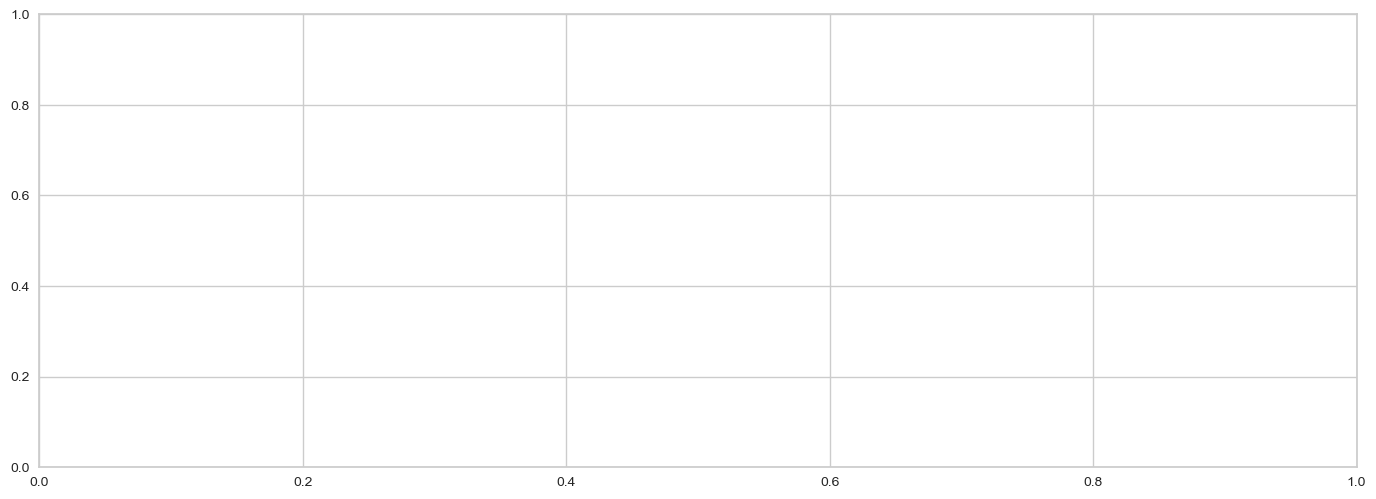

In [ ]:
evaluate_model(tuned_best)